# 囚人のジレンマのネットワーク配置

## Axelrodパッケージのインストール

In [1]:
!pip install axelrod
#!pip install numpy
#!pip install matplotlib

## NetworkX（グラフ用ライブラリ）のインストール

In [2]:
pip install networkx

Note: you may need to restart the kernel to use updated packages.


## Axelrodなど関連ライブラリのインポート

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
import axelrod as axl

## NetworkX（グラフ用ライブラリ）のインポート

In [4]:
import networkx as nx

## 定数の設定

In [5]:
NUM_STRATEGY = 3 #使用する戦略の数
NUM_MATCH = 5 #対戦数
NUM_AGENT = 100 #エージェント（ノード）数

#0:C(協調), 1:D(裏切り)

## 戦略の設定
これにより0～12といった番号で戦略を指定できるようにしている

In [6]:
strategy = [axl.Cooperator(),#0
            axl.Alternator(),#1
            axl.Defector(),#2
            axl.Random(),#3
            axl.TitForTat(),#4
            axl.Grudger(),#5
            axl.CyclerDDC(),#6
            axl.CyclerCCD(),#7
            axl.GoByMajority(),#8
            axl.SuspiciousTitForTat(),#8
            axl.Prober(),#10
            axl.OriginalGradual(),#11
            axl.WinStayLoseShift(),#12
            ]

## 各エージェントの周りのエージェントのIDを設定

In [7]:
def SetConnection(A, edge_list):
    for e in edge_list:
        A[e[0]].SetConnection(e[1])
        A[e[1]].SetConnection(e[0])

## 対戦と戦略の変更

In [8]:
def Play(A):
    for i in range(NUM_AGENT):
        A[i].SetParameter()
    for i in range(NUM_AGENT):
        A[i].Match(A)
    for i in range(NUM_AGENT):
        A[i].ChangeStrategy(A)

## 表示のための設定

In [9]:
def MakeField(A):
    pc = []
    #カラー表示の場合
#    cmap = ['r', 'g', 'b', 'c', 'm', 'y', 'k', 'w', 'lightblue', 'orange','lightgreen','lightgrey', 'gold']
    #白黒表示の場合
    cmap = [[1-i/(NUM_STRATEGY-1),1-i/(NUM_STRATEGY-1),1-i/(NUM_STRATEGY-1)] for i in range(NUM_STRATEGY)]
    for i in range(NUM_AGENT):
        pc.append(cmap[A[i].strategy])
    return pc


## エージェントクラス

In [10]:
class Agent():
    def __init__(self, n):
#        self.strategy = np.random.randint(NUM_STRATEGY)#均等に初期配置
        self.strategy = np.random.randint(10)
        if self.strategy>2 : self.strategy=0
        self.IDs = []
        self.score = 0
    def SetConnection(self, id):
        self.IDs.append(id)
    def SetParameter(self):
        self.score = 0
    def Match(self, A):
        global strategy
        for i in self.IDs:
            match = axl.Match([strategy[self.strategy], strategy[A[i].strategy]], NUM_MATCH)
            match.play()
            self.score += match.final_score()[0]
    def ChangeStrategy(self,A):
        average_score = 0
        for i in self.IDs:
            average_score += A[i].score
        average_score /= len(self.IDs)
        if self.score < average_score:
            self.strategy = np.random.randint(NUM_STRATEGY)

## ネットワークの設定
ランダムネットワークの場合はこれを実行

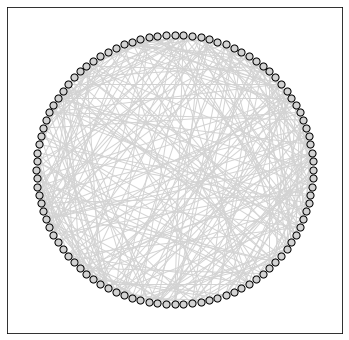

In [16]:
#ランダムネットワークの場合
G = nx.gnp_random_graph(NUM_AGENT, 0.05)
pos = nx.circular_layout(G)

plt.subplots(figsize = (6, 6))
nx.draw_networkx(G, pos,node_color="lightgrey", edgecolors='k', edge_color='lightgrey', node_size=50, with_labels=False)

## ネットワークの設定
スケールフリーネットワークの場合はこれを実行

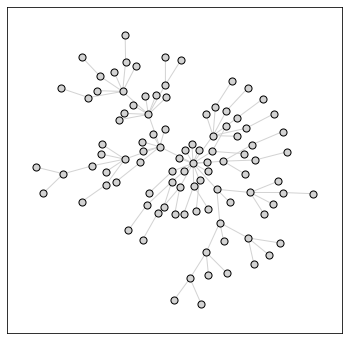

In [17]:
#スケールフリーネットワークの場合
G = nx.barabasi_albert_graph(n = NUM_AGENT, m=1)
pos = nx.kamada_kawai_layout(G)

plt.subplots(figsize = (6, 6))
nx.draw_networkx(G, pos,node_color="lightgrey", edgecolors='k', edge_color='lightgrey', node_size=50, with_labels=False)

## 実行と表示

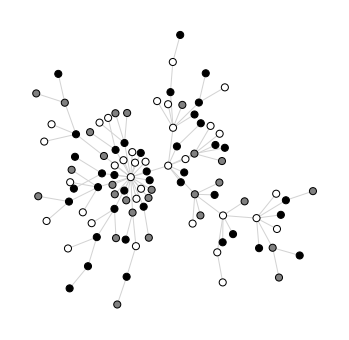

In [13]:
np.random.seed( 0 )
A = [Agent(i) for i in range(NUM_AGENT)]
SetConnection(A, list(nx.edges(G)))

fig, ax = plt.subplots(1, 1, figsize=(6, 6))
def update(k):
    global n
    plt.cla()
    plt.axis('off')
    pc = MakeField(A)
    nx.draw_networkx(G, pos, node_color=pc, edgecolors='k', edge_color='lightgrey', node_size=50, with_labels=False)
    Play(A)
    
ani = animation.FuncAnimation(fig, update, interval = 100, frames = 10, repeat=False)
HTML(ani.to_jshtml())#jupyter notebookに表示
#ani.save("anim.gif")#gifアニメーションファイルの保存

## Anacondaを利用した場合gifアニメーションが生成される

In [14]:
pip install Pillow 

Note: you may need to restart the kernel to use updated packages.


MovieWriter ffmpeg unavailable; using Pillow instead.


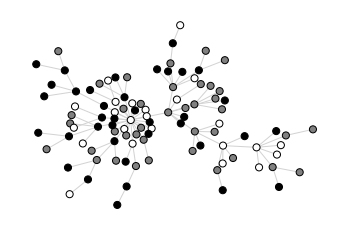

In [15]:
ani.save("Net_random.gif")#gifアニメーションファイルの保存
#ani.save("Net_scalefree.gif")#gifアニメーションファイルの保存